In [14]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers
from keras.preprocessing import image
import matplotlib.pyplot as plt
import splitfolders
import numpy as np
#i212247

In [15]:
IMAGE_SIZE = 256
CHANNELS = 3
input_folder = 'C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\PlantVillage\\'
output_folder = 'C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\PlantVillage\\'

#splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(0.8, 0.1, 0.1))

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\PlantVillage\\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        save_to_dir="C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\training\\Augmented"
)

Found 1721 images belonging to 3 classes.


In [17]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [18]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\PlantVillage\\val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [20]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'C:\\Users\\Talha\\OneDrive\\Documents\\Dip_Canker\\PlantVillage\\test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 216 images belonging to 3 classes.


In [21]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model1 = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [22]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 64)      

In [23]:
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [24]:
history = model1.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=12,
)
# model1 = models.load_model("../cankerMod.h5")

Epoch 1/12
47/47 [==============================] - 211s 4s/step - loss: 0.9196 - accuracy: 0.4923 - val_loss: 0.8762 - val_accuracy: 0.5208
Epoch 2/12
47/47 [==============================] - 204s 4s/step - loss: 0.8396 - accuracy: 0.5538 - val_loss: 0.7247 - val_accuracy: 0.7031
Epoch 3/12
47/47 [==============================] - 202s 4s/step - loss: 0.5307 - accuracy: 0.7695 - val_loss: 0.2997 - val_accuracy: 0.8958
Epoch 4/12
47/47 [==============================] - 205s 4s/step - loss: 0.4112 - accuracy: 0.8323 - val_loss: 0.3864 - val_accuracy: 0.8385
Epoch 5/12
47/47 [==============================] - 201s 4s/step - loss: 0.3993 - accuracy: 0.8323 - val_loss: 0.2913 - val_accuracy: 0.8854
Epoch 6/12
47/47 [==============================] - 204s 4s/step - loss: 0.2483 - accuracy: 0.9065 - val_loss: 0.2706 - val_accuracy: 0.9271
Epoch 7/12
47/47 [==============================] - 205s 4s/step - loss: 0.2789 - accuracy: 0.8898 - val_loss: 0.1942 - val_accuracy: 0.9271
Epoch 8/12
47

In [25]:
scores = model1.evaluate(test_generator)

7/7 [==============================] - 9s 1s/step - loss: 0.1423 - accuracy: 0.9537


In [26]:
history.params

{'verbose': 1, 'epochs': 12, 'steps': 47}

In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

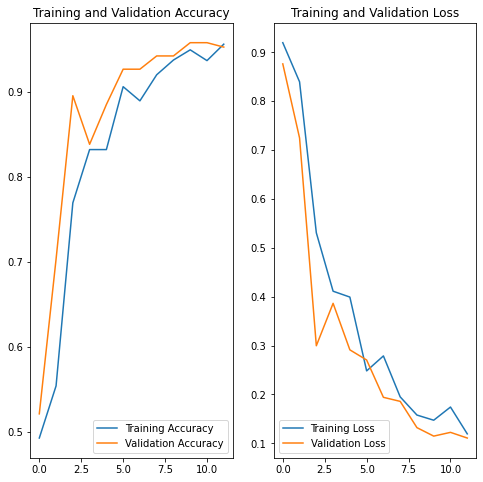

In [30]:
EPOCHS = 12

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model1.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 52ms/step


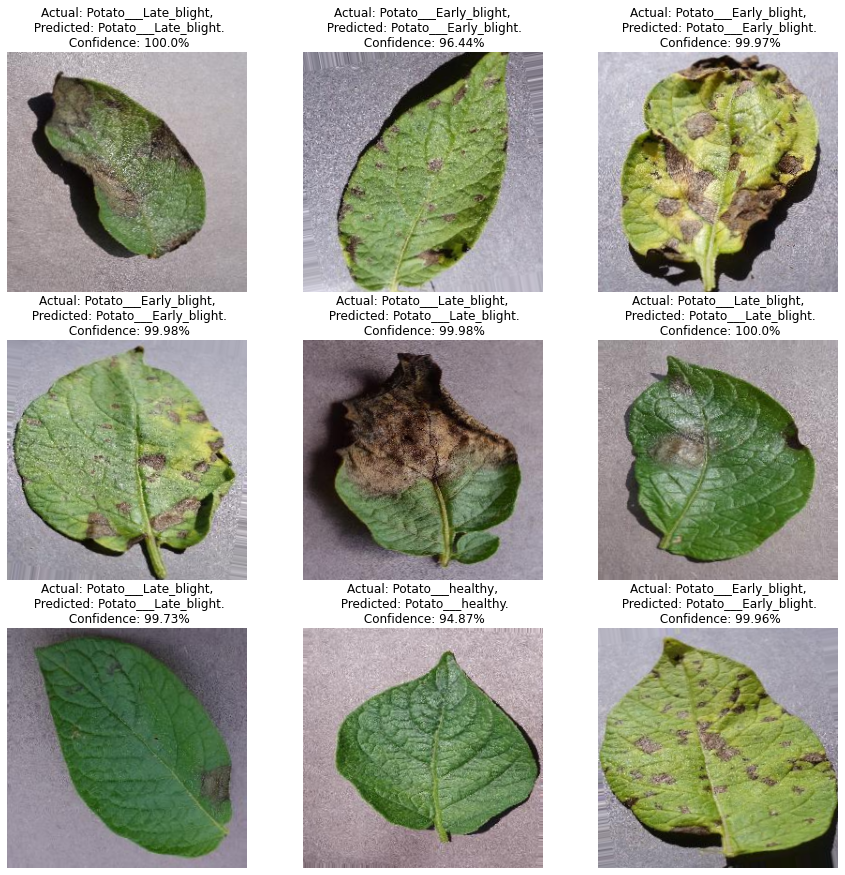

In [32]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model1, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [33]:
model1.save("../cankerMod.h5")